In [2]:
import numpy as np
import pandas as pd
pd.set_option("display.date_dayfirst", True)
pd.set_option("display.date_yearfirst", False)
#pd.describe_option('display.date_yearfirst')
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.mlab as mlab
import matplotlib.pylab as pylab

import os
cwd = os.getcwd()

## Import (Summarised) Data
Data for NRRA has been grouped together into a single tab in an excel file
Not all data is included.
-If limited data exisited that row was removed.
-PTV2 (Main PTV) and Coronal slice included

In [7]:
filepath = 'Data to Import/NRRAsummary-Anon.xlsx'

#fullpath=cwd+'/'+filepath # use if need to specify full path for some reason.
#print(fullpath) #note forward and backward slashes in output

all_data = pd.read_excel(filepath)
d=all_data
d.head(2)

,ID Code,Average OP,5cm deep Avg,IC in Octavius Avg,Alanine (%),Diff IC - Alanine(%),Alanine SD %,Diff (Oct - 5 deep),2D Array Coronal Diff (%),IC measured (corrected) cGy,...,Global 4%/4mm,Global 4%/3mm,Global 4%/2mm,Global 4%/1mm,Global 3%/3mm,Global 3%/2mm,Global 3%/1mm,Global 2%/2mm,Global 2%/1mm,Global 1%/1mm
0,1,1.0060,0.006,0.0000,0.005741,-0.005741,0.205078,-0.0060,1.063264,191.459623,...,100,100,100,98.3,100,100,94.2,100,83.1,66.3
1,2,0.9985,-0.005,0.0025,0.008753,-0.006253,0.449162,0.0075,0.652073,223.606238,...,100,100,100,100.0,100,100,100.0,100,100.0,91.9


##Brief Stats
First 12 measurements contained Alanine and IC measurements

In [12]:
mean = np.mean(d) # this needs to be energy specific
sd = np.std(d)

#d.dtypes
#d.groupby(['Round'])['Centre'].nunique().reset_index() # number of unique dates = number of visits
d.describe()

,ID Code,Average OP,5cm deep Avg,IC in Octavius Avg,Alanine (%),Diff IC - Alanine(%),Alanine SD %,Diff (Oct - 5 deep),2D Array Coronal Diff (%),IC measured (corrected) cGy,...,Global 4%/4mm,Global 4%/3mm,Global 4%/2mm,Global 4%/1mm,Global 3%/3mm,Global 3%/2mm,Global 3%/1mm,Global 2%/2mm,Global 2%/1mm,Global 1%/1mm
count,35.000000,35.000000,31.000000,35.000000,34.000000,35.000000,34.000000,31.000000,34.000000,12.000000,...,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000,34.000000
mean,21.285714,1.002942,0.004454,-0.000099,-0.002874,0.002003,0.514010,-0.002966,-0.073925,191.972928,...,97.050000,96.279412,94.982353,92.197059,94.682353,92.355882,87.485294,87.814706,77.838235,59.600000
std,13.021637,0.008587,0.007104,0.010207,0.010246,0.005899,0.651596,0.007192,1.653565,12.495285,...,10.891232,13.243541,15.401898,17.234259,15.582400,17.768037,19.855922,20.331020,23.492875,23.102827
min,1.000000,0.981602,-0.010000,-0.018398,-0.019800,-0.018517,0.205078,-0.014000,-4.900000,175.225073,...,38.600000,26.100000,16.500000,10.200000,15.800000,8.900000,3.000000,6.300000,1.000000,0.300000
25%,9.500000,0.998450,0.000250,-0.007500,-0.011886,-0.000957,0.324553,-0.007063,-0.975432,185.594444,...,99.475000,99.350000,97.750000,93.325000,97.425000,93.075000,82.575000,83.900000,69.000000,43.500000
50%,22.000000,1.003500,0.004500,0.000000,-0.001730,0.002348,0.385831,-0.003000,0.313488,187.582301,...,100.000000,100.000000,100.000000,98.050000,100.000000,99.200000,95.600000,97.000000,87.100000,64.800000
75%,32.500000,1.008250,0.008250,0.006500,0.005839,0.006257,0.500172,-0.000750,1.009875,195.147509,...,100.000000,100.000000,100.000000,99.925000,100.000000,100.000000,98.175000,99.325000,95.225000,76.500000
max,42.000000,1.020000,0.020000,0.018517,0.018000,0.012476,4.143731,0.016500,2.708907,223.606238,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,93.700000


##Quick plot of Average OP
Shows similar +/-2% variation

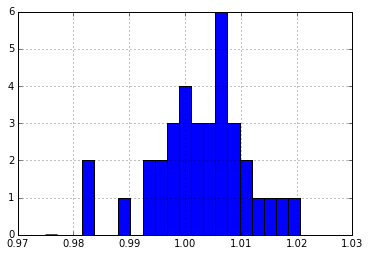

In [32]:
d['Average OP'].hist(normed=False, bins=23, range=(0.975,1.025), rwidth=1) #simple auto plot in a grid
#d['Average OP'].hist(normed=False, bins=21) #simple auto plot in a grid


##IC vs Alanine


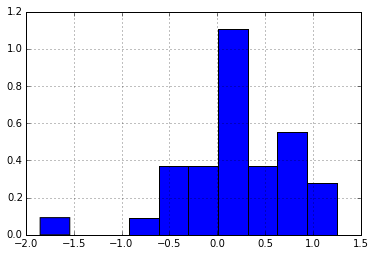

In [33]:
(100*d['Diff IC - Alanine(%)']).hist(normed=True)

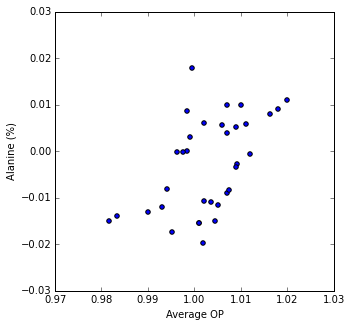

In [39]:
plt.figure(figsize=(5,5))
plt.scatter(d['Average OP'], d['Alanine (%)'])
plt.xlim(0.97, 1.03)
plt.ylim(-0.03,0.03)
plt.xlabel('Average OP')
plt.ylabel('Alanine (%)')

##IC corrected Dif (%)

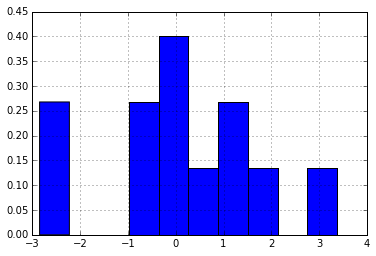

In [8]:
d['IC corrected Diff (%)'].hist(normed=True)

##IC uncorrected Diff (%)

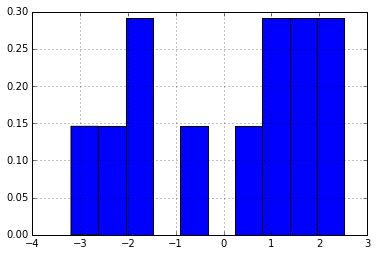

In [9]:
d['IC uncorrected Diff (%)'].hist(normed=True)

##Point dose diff (%)

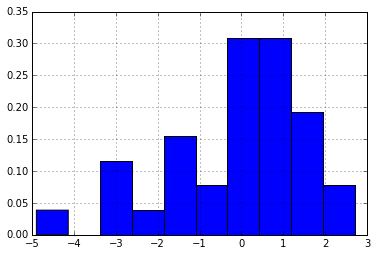

In [7]:
d['2D Array Coronal Diff (%)'].hist(normed=True)

##Gamma 2%/2mm

(0, 100)

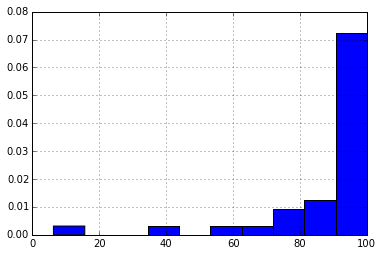

In [10]:
d['Global 2%/2mm'].hist(normed=True)
plt.xlim(0,100)

[        nan  15.5339352]
 
nan x + 15.53


C:\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:588: RankWarning: Polyfit may be poorly conditioned
  warnings.warn(msg, RankWarning)


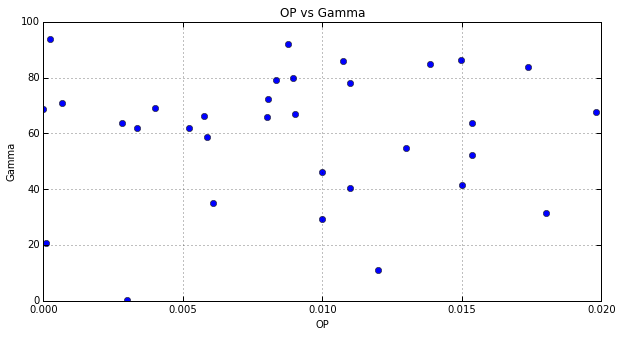

In [11]:
pylab.rcParams['figure.figsize'] = 10, 5 # change size of figures
fig1 = plt.figure()
axes1 = fig1.add_subplot(1,1,1)
plt.title('OP vs Gamma')
plt.xlabel("OP")
plt.ylabel("Gamma")
#plt.ylim(0.97, 1.03)
#axes1.xaxis.set_minor_locator(AutoMinorLocator(4)) #used to set the number of minor ticks between major ticks
plt.tick_params(which='major', width=1, length=5)
plt.tick_params(which='minor', width=1, length=3)
plt.grid(True, which='major')

x = abs(d['Alanine (%)'])
#x = d['Alanine (%)']
y = d['Global 1%/1mm']

coefficients = np.polyfit(x, y, 1)
polynomial = np.poly1d(coefficients)
ys = polynomial(x)
print (coefficients)
print (polynomial)

#plot(x, y, 'o')
#plot(x, ys)

line1 = axes1.plot(x, y, 'o', color='blue')
line2 = axes1.plot(x, ys, '-')

In [23]:
ds = d[['Average OP','Alanine (%)','2D Array Coronal Diff (%)', 'Global 2%/1mm']]
ds.head()

,Average OP,Alanine (%),2D Array Coronal Diff (%),Global 2%/1mm
0,1.0060,0.005741,1.063264,83.1
1,0.9985,0.008753,0.652073,100.0
2,0.9963,-0.000098,-2.720000,36.5
3,1.0010,-0.015348,2.074468,80.5
4,1.0010,-0.015348,-0.173310,69.3


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x19FFF030>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x19D25110>]], dtype=object)

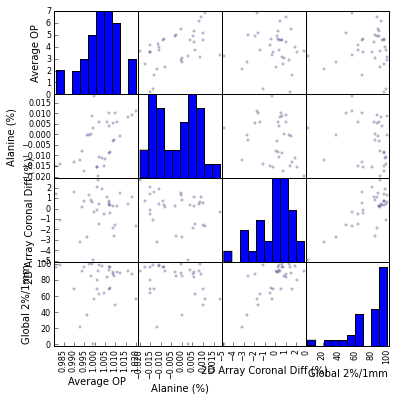

In [27]:
%matplotlib inline 
#qt for seperate window

from pandas.tools.plotting import scatter_matrix

df = pd.DataFrame(np.random.randn(1000, 4), columns=['a', 'b', 'c', 'd'])

scatter_matrix(ds, alpha=0.2, figsize=(6, 6), diagonal='hist') #diagonal ='kde' gives a density plot